<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 3: Practical - Variational Autoencoder (VAE) <br>
<font color=696880 size=4>
    Mahdi Manouchehry (mahdimanouchehry14@gmail.com) <br>
    
____


### Full Name : Abolfazl Malekahmadi
### Student Number : 401205167
__

In [17]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt 


#Add Additional libraries here


torch.manual_seed(42)

In [10]:
# Load the MNIST dataset
data = datasets.MNIST('data', train=True, download=True,
                   transform=transforms.ToTensor())




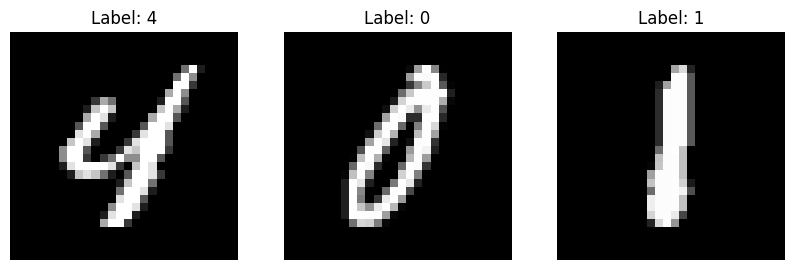

In [11]:
#################### Problem 01  ####################
import random

random_samples = random.sample(range(len(data)), 3)

# Display the 3 random samples
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for i, sample_idx in enumerate(random_samples):
    img, label = data[sample_idx]
    axes[i].imshow(img.squeeze().numpy(), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()

In [12]:
class VAE(nn.Module):
    def __init__(self, hidden_size, latent_size):
        super(VAE, self).__init__()

        # Assign the dimensions of the hidden layer and the latent space
        self.hidden_dim = hidden_size
        self.latent_dim = latent_size

        # Define Encoder layers
        self.encoder_fc1 = nn.Linear(28 * 28, self.hidden_dim)
        self.encoder_fc2_mu = nn.Linear(self.hidden_dim, self.latent_dim)
        self.encoder_fc2_logvar = nn.Linear(self.hidden_dim, self.latent_dim)

        # Define Decoder layers
        self.decoder_fc1 = nn.Linear(self.latent_dim, self.hidden_dim)
        self.decoder_fc2 = nn.Linear(self.hidden_dim, 28 * 28)

    def encode(self, x):
        h = F.relu(self.encoder_fc1(x))
        mu = self.encoder_fc2_mu(h)
        logvar = self.encoder_fc2_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.decoder_fc1(z))
        return torch.sigmoid(self.decoder_fc2(h))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28 * 28))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [13]:
def loss_function(recon_x, x, mu, logvar):
    # Compute the binary cross-entropy between the reconstructed data and the original data
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 28 * 28), reduction='sum')

    # Compute the KL divergence between the Gaussian distribution of the latent space and a standard normal distribution
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # Return the sum of binary cross-entropy and KL divergence as the total loss
    return BCE + KLD

In [14]:
def train(model, optimizer, train_loader, device):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

In [15]:
#################### Problem 09  ####################
  # Set the batch size for loading the data
####################################################
batch_size = 128


#################### Problem 10  ####################
  #Create a data loader object that shuffles and batches the data
####################################################
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


#Choose the device (CPU or GPU) based on availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Create an instance of the VAE model and move it to the device
hidden_size = 200
latent_size = 20
model = VAE(hidden_size, latent_size).to(device)

#################### Problem 11  ####################
#Create an instance of the Adam optimizer with a learning rate(try different learning rate)
#Set the number of epochs to train the model 
####################################################
from torch.optim import Adam

optimizer = Adam(model.parameters(), lr=0.001)
epochs = 100

for epoch in range(1, epochs+1):
    train(model, optimizer, train_loader, device)




====> Epoch: 1 Average loss: 178.9921
====> Epoch: 2 Average loss: 130.1613
====> Epoch: 3 Average loss: 120.3332
====> Epoch: 4 Average loss: 116.0001
====> Epoch: 5 Average loss: 113.6381
====> Epoch: 6 Average loss: 112.1838
====> Epoch: 7 Average loss: 111.0329
====> Epoch: 8 Average loss: 110.1920
====> Epoch: 9 Average loss: 109.5590
====> Epoch: 10 Average loss: 109.0298
====> Epoch: 11 Average loss: 108.5359
====> Epoch: 12 Average loss: 108.1916
====> Epoch: 13 Average loss: 107.9356
====> Epoch: 14 Average loss: 107.6236
====> Epoch: 15 Average loss: 107.3488
====> Epoch: 16 Average loss: 107.1429
====> Epoch: 17 Average loss: 106.9920
====> Epoch: 18 Average loss: 106.7545
====> Epoch: 19 Average loss: 106.6752
====> Epoch: 20 Average loss: 106.4673
====> Epoch: 21 Average loss: 106.3455
====> Epoch: 22 Average loss: 106.2290
====> Epoch: 23 Average loss: 106.1136
====> Epoch: 24 Average loss: 105.9483
====> Epoch: 25 Average loss: 105.8931
====> Epoch: 26 Average loss: 105.

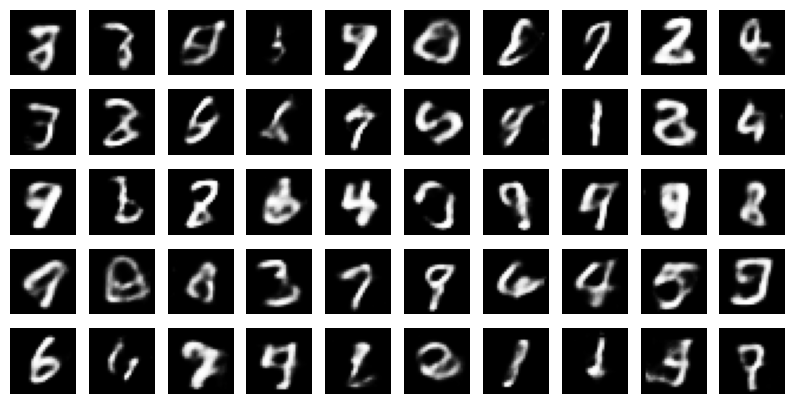

In [16]:
with torch.no_grad():
    z = torch.randn(batch_size, 20).to(device)
    sample = model.decode(z).cpu()
    
    # Plot the generated images
    fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(10,5))
    for i in range(5):
        for j in range(10):
            ax[i][j].imshow(sample[i*10+j].reshape(28, 28), cmap='gray')
            ax[i][j].axis('off')
    plt.show()